In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv('/content/skincare.csv')

In [3]:
data.head()

,Unnamed: 0,Title,Product,Category,Brand,Skin_Type,Number of items,Sold By,Price,Link
0,0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,All,1,AIR SALES,372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,SKINCARE,Nivea,All,1,RK World Infocom Pvt Ltd,226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,Dry,1,MURALI RETAILS,103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,SKINCARE,Biotique,Combination,1,RK World Infocom Pvt Ltd,240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,SKINCARE,Minimalist,Dry,1,Minimalist Inc,284,https://www.amazon.in/Minimalist-Moisturizer-H...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1438 non-null   int64 
 1   Title            1438 non-null   object
 2   Product          1438 non-null   object
 3   Category         1438 non-null   object
 4   Brand            1438 non-null   object
 5   Skin_Type        1438 non-null   object
 6   Number of items  1438 non-null   int64 
 7   Sold By          1231 non-null   object
 8   Price            1438 non-null   int64 
 9   Link             1438 non-null   object
dtypes: int64(3), object(7)
memory usage: 112.5+ KB


In [5]:
data.describe()

,Unnamed: 0,Number of items,Price
count,1438.000000,1438.000000,1438.000000
mean,718.500000,1.563978,619.605702
std,415.259156,13.273306,1481.257665
min,0.000000,1.000000,45.000000
25%,359.250000,1.000000,199.000000
50%,718.500000,1.000000,296.500000
75%,1077.750000,1.000000,476.000000
max,1437.000000,500.000000,23617.000000


In [6]:
## Get unique values for each column without any modification
unique_title_names=data['Title'].unique().tolist()
unique_product_names = data['Product'].unique().tolist()
unique_brand_names = data['Brand'].unique().tolist()
unique_skin_type_names = data['Skin_Type'].unique().tolist()
unique_sold_by_names = data['Sold By'].unique().tolist()

# Display the lists of unique values
print("\nUnique Title Names:")
print(unique_title_names)

print("Unique Product Names:")
print(unique_product_names)

print("\nUnique Brand Names:")
print(unique_brand_names)

print("\nUnique Skin Types:")
print(unique_skin_type_names)

print("\nUnique Sold By Names:")
print(unique_sold_by_names)


Unique Title Names:
['        Nivea Soft Light Moisturizer For Face, Hand & Body, Instant Hydration, Non-Greasy Cream With Vitamin E & Jojoba Oil, 300 Ml       ', '        Nivea Soft Playful Peach, Light Moisturizer Cream For Face, Hands And Body, Instant Hydration, Non-Greasy Cream With Vitamin E & Jojoba Oil 200 Ml       ', '        Nivea Soft Light Moisturizer For Face, Hand & Body, Instant Hydration, Non-Greasy Cream With Vitamin E & Jojoba Oil, 50ml       ', '        Biotique Morning Nectar Flawless Skin Moisturizer For All Skin Types, 190Ml       ', '        Minimalist Marula Oil 5% Face Moisturizer For Dry Skin With Hyaluronic Acid For Deep Nourishment & Hydration For Unisex, 50g       ', '        Cetaphil Moisturizing Lotion for Normal to Combination, Sensitive Skin| 100 ml| Moisturizer with Niacinamide, Panthenol| Non-greasy, Won’t Clog Pores| Dermatologist Recommended| Paraben, Sulphate Free       ', '        Lakme Absolute Hydra Pro Overnight Gel, 50 g       ', '        Neu

In [7]:
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])
data['Skin_Type'] = data['Skin_Type'].fillna(data['Skin_Type'].mode()[0])
data['Price'] = data['Price'].fillna(data['Price'].median())

In [8]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Display the columns with missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Unnamed: 0           0
Title                0
Product              0
Category             0
Brand                0
Skin_Type            0
Number of items      0
Sold By            207
Price                0
Link                 0
dtype: int64


In [9]:
# Fill missing values
# For numeric columns, fill with the median (or any strategy you prefer)
data['Price'] = data['Price'].fillna(data['Price'].median())
# For categorical columns, fill with the most frequent value (mode)
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])
data['Skin_Type'] = data['Skin_Type'].fillna(data['Skin_Type'].mode()[0])
data['Sold By'] = data['Sold By'].fillna(data['Sold By'].mode()[0])

# Check again for missing values after filling
missing_values_after_filling = data.isnull().sum()

# Display missing values after filling
print("\nMissing Values After Filling:")
print(missing_values_after_filling)


Missing Values After Filling:
Unnamed: 0         0
Title              0
Product            0
Category           0
Brand              0
Skin_Type          0
Number of items    0
Sold By            0
Price              0
Link               0
dtype: int64


In [10]:
# Drop duplicate entries
data.drop_duplicates(inplace=True)

# Verify duplicates are removed
print("Number of duplicates:", data.duplicated().sum())

Number of duplicates: 0


In [11]:
# Ensure 'Price' is numeric
data['Price'] = data['Price'].astype(float)

# Optionally scale the 'Price' column (if necessary)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Scale Price to a range of 0 to 1
data['Scaled_Price'] = scaler.fit_transform(data[['Price']])

# Use 'Scaled_Price' for regression if needed


In [12]:
# Encoding categorical features (Product, Brand, Skin_Type)
product_encoder = LabelEncoder()
data['Product'] = product_encoder.fit_transform(data['Product'])

brand_encoder = LabelEncoder()
data['Brand'] = brand_encoder.fit_transform(data['Brand'])

skin_type_encoder = LabelEncoder()
data['Skin_Type'] = skin_type_encoder.fit_transform(data['Skin_Type'])

# Prepare features and labels for training
X = data[['Product', 'Brand', 'Skin_Type']].values
# Selecting multiple columns using a list of column names
y = data[['Product', 'Brand', 'Skin_Type','Price']].values  # Target variable can be Price or Ratings

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 1150
Testing Set Size: 288


In [14]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot encode the categorical target variables (Product, Brand, Skin_Type)
# One-Hot encode the categorical target variables (Product, Brand, Skin_Type)
encoder_product = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_brand = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_skin_type = OneHotEncoder(sparse_output=False, handle_unknown='ignore')# Change 'sparse' to 'sparse_output'

y_product = encoder_product.fit_transform(y_train[:, 0].reshape(-1, 1))
y_brand = encoder_brand.fit_transform(y_train[:, 1].reshape(-1, 1))
y_skin_type = encoder_skin_type.fit_transform(y_train[:, 2].reshape(-1, 1))

# Reshape the price column to have 2 dimensions
y_price = y_train[:, 3].reshape(-1, 1)

# Combine the encoded variables into a single target array
y_train_encoded = np.hstack([y_product, y_brand, y_skin_type, y_price])

# Similarly, for the test set:
y_product_test = encoder_product.transform(y_test[:, 0].reshape(-1, 1))
y_brand_test = encoder_brand.transform(y_test[:, 1].reshape(-1, 1))
y_skin_type_test = encoder_skin_type.transform(y_test[:, 2].reshape(-1, 1))

# Reshape the price column for the test set
y_price_test = y_test[:, 3].reshape(-1, 1)

# Combine the encoded variables into a single test target array
y_test_encoded = np.hstack([y_product_test, y_brand_test, y_skin_type_test, y_price_test])

print(f"Encoded y_train shape: {y_train_encoded.shape}")
print(f"Encoded y_test shape: {y_test_encoded.shape}")

Encoded y_train shape: (1150, 501)
Encoded y_test shape: (288, 501)


In [15]:
# Function to build the multi-output recommendation model
def build_model(num_products, num_brands, num_skin_types, embedding_dim=50):
    product_input = tf.keras.Input(shape=(1,), name='Product_Input')
    brand_input = tf.keras.Input(shape=(1,), name='Brand_Input')
    skin_type_input = tf.keras.Input(shape=(1,), name='Skin_Type_Input')

    # Embedding layers for each input feature
    product_embedding = tf.keras.layers.Embedding(num_products, embedding_dim)(product_input)
    brand_embedding = tf.keras.layers.Embedding(num_brands, embedding_dim)(brand_input)
    skin_type_embedding = tf.keras.layers.Embedding(num_skin_types, embedding_dim)(skin_type_input)

    # Flatten the embedding layers
    product_flat = tf.keras.layers.Flatten()(product_embedding)
    brand_flat = tf.keras.layers.Flatten()(brand_embedding)
    skin_type_flat = tf.keras.layers.Flatten()(skin_type_embedding)

    # Concatenate the embeddings
    concatenated = tf.keras.layers.concatenate([product_flat, brand_flat, skin_type_flat])

    # Dense layers for final prediction
    dense = tf.keras.layers.Dense(128, activation='relu')(concatenated)

    # Multiple outputs: Product, Brand, Skin_Type, and Price
    product_output = tf.keras.layers.Dense(1, activation='linear', name='Product_Output')(dense)
    brand_output = tf.keras.layers.Dense(1, activation='linear', name='Brand_Output')(dense)
    skin_type_output = tf.keras.layers.Dense(1, activation='linear', name='Skin_Type_Output')(dense)
    price_output = tf.keras.layers.Dense(1, activation='linear', name='Price_Output')(dense)

    # Corrected line: Removed the undefined variable 't'
    model = tf.keras.Model(inputs=[product_input, brand_input, skin_type_input], outputs=[product_output, brand_output, skin_type_output, price_output])
    model.compile(optimizer='adam',
                  loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy', 'mse'],
                  # Provide a metric for each output
                  metrics=[['accuracy'], ['accuracy'], ['accuracy'], ['mae', 'mse']])
    return model


In [16]:
# Get the number of unique values for each feature
num_products = len(data['Product'].unique())
num_brands = len(data['Brand'].unique())
num_skin_types = len(data['Skin_Type'].unique())

# Build and summarize the model
model = build_model(num_products, num_brands, num_skin_types)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Product_Input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Brand_Input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Skin_Type_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 50)          │            250 │ Product_Input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 50)          │         25,450 │ Brand_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 50)          │          2,850 │ Skin_Type_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 50)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 50)             │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 150)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         19,328 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Product_Output (Dense)    │ (None, 1)              │            129 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Brand_Output (Dense)      │ (None, 1)              │            129 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Skin_Type_Output (Dense)  │ (None, 1)              │            129 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Price_Output (Dense)      │ (None, 1)              │            129 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 48,394 (189.04 KB)

 Trainable params: 48,394 (189.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(
    [X_train[:, 0], X_train[:, 1], X_train[:, 2]],  # Input: Product, Brand, Skin_Type
    [y_train[:, 0], y_train[:, 1], y_train[:, 2], y_train[:, 3]],  # Targets: Product, Brand, Skin_Type, Price
    epochs=10,
    batch_size=32,
    validation_data=([X_test[:, 0], X_test[:, 1], X_test[:, 2]], [y_test[:, 0], y_test[:, 1], y_test[:, 2], y_test[:, 3]])
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Brand_Output_accuracy: 0.0021 - Brand_Output_loss: 3.1777e-05 - Price_Output_loss: 2291905.7500 - Price_Output_mae: 593.6520 - Price_Output_mse: 2291905.7500 - Product_Output_accuracy: 0.1939 - Product_Output_loss: 2.4083e-07 - Skin_Type_Output_accuracy: 0.0030 - Skin_Type_Output_loss: 1.6801e-06 - loss: 2291905.7500

/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - Brand_Output_accuracy: 0.0020 - Brand_Output_loss: 3.1754e-05 - Price_Output_loss: 2301371.7500 - Price_Output_mae: 595.0090 - Price_Output_mse: 2301535.5000 - Product_Output_accuracy: 0.1937 - Product_Output_loss: 2.4095e-07 - Skin_Type_Output_accuracy: 0.0030 - Skin_Type_Output_loss: 1.6835e-06 - loss: 2301535.5000 - val_Brand_Output_accuracy: 0.0000e+00 - val_Brand_Output_loss: 3.3241e-05 - val_Price_Output_loss: 2995244.0000 - val_Price_Output_mae: 617.7726 - val_Price_Output_mse: 2995244.0000 - val_Product_Output_accuracy: 0.2222 - val_Product_Output_loss: 2.3428e-07 - val_Skin_Type_Output_accuracy: 0.0000e+00 - val_Skin_Type_Output_loss: 1.6677e-06 - val_loss: 2995244.0000
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Brand_Output_accuracy: 0.0015 - Brand_Output_loss: 3.1332e-05 - Price_Output_loss: 3268903.7500 - Price_Output_mae: 644.3077 - Price_Output_mse: 3268790.2500 - Product_Output_accuracy: 0.1730 - Product_Output_loss: 2

In [18]:
# Evaluate the model on the test set
evaluation = model.evaluate(
    [X_test[:, 0], X_test[:, 1], X_test[:, 2]],  # Input features
    [y_test[:, 0], y_test[:, 1], y_test[:, 2], y_test[:, 3]]  # Targets: Product, Brand, Skin_Type, Price
)

# Print results for each output
print("Evaluation Results:")
for i, output_name in enumerate(model.output_names):
    print(f"{output_name}: Loss = {evaluation[i*2]:.4f}, Metric = {evaluation[i*2+1]:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Brand_Output_accuracy: 0.0000e+00 - Brand_Output_loss: 3.1620e-05 - Price_Output_loss: 2527098.2500 - Price_Output_mae: 533.3361 - Price_Output_mse: 2527098.2500 - Product_Output_accuracy: 0.1768 - Product_Output_loss: 2.3046e-07 - Skin_Type_Output_accuracy: 0.0000e+00 - Skin_Type_Output_loss: 1.7696e-06 - loss: 2527098.2500
Evaluation Results:
Product_Output: Loss = 2537544.2500, Metric = 0.0000
Brand_Output: Loss = 0.0000, Metric = 0.0000
Skin_Type_Output: Loss = 2537544.2500, Metric = 0.0000
Price_Output: Loss = 538.3907, Metric = 2537544.2500


In [19]:
# Evaluate the model
evaluation = model.evaluate(
    [X_test[:, 0], X_test[:, 1], X_test[:, 2]],  # Inputs
    [y_test[:, 0], y_test[:, 1], y_test[:, 2], y_test[:, 3]]  # True values
)

print("Evaluation Results:")
print(f"Product Prediction - Accuracy: {evaluation[1]:.2f}")
print(f"Brand Prediction - Accuracy: {evaluation[3]:.2f}")
print(f"Skin Type Prediction - Accuracy: {evaluation[5]:.2f}")
print(f"Price Prediction - Mean Absolute Error: {evaluation[7]:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Brand_Output_accuracy: 0.0000e+00 - Brand_Output_loss: 3.1620e-05 - Price_Output_loss: 2527098.2500 - Price_Output_mae: 533.3361 - Price_Output_mse: 2527098.2500 - Product_Output_accuracy: 0.1768 - Product_Output_loss: 2.3046e-07 - Skin_Type_Output_accuracy: 0.0000e+00 - Skin_Type_Output_loss: 1.7696e-06 - loss: 2527098.2500
Evaluation Results:
Product Prediction - Accuracy: 0.00
Brand Prediction - Accuracy: 0.00
Skin Type Prediction - Accuracy: 0.00
Price Prediction - Mean Absolute Error: 2537544.25


In [20]:
# Generate predictions
predictions = model.predict([X_test[:, 0], X_test[:, 1], X_test[:, 2]])

# Extract predicted and true labels for evaluation
y_pred_product = predictions[0]
y_pred_brand = predictions[1]
y_pred_skin_type = predictions[2]
y_pred_price = predictions[3]

# Convert one-hot encoded predictions back to labels for categorical outputs
y_true_product = y_test[:, 0]
y_true_brand = y_test[:, 1]
y_true_skin_type = y_test[:, 2]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predictions to labels (if applicable)
y_pred_product_labels = np.argmax(y_pred_product, axis=1)
y_pred_brand_labels = np.argmax(y_pred_brand, axis=1)
y_pred_skin_type_labels = np.argmax(y_pred_skin_type, axis=1)

# Calculate metrics for product predictions
precision = precision_score(y_true_product, y_pred_product_labels, average='weighted')
recall = recall_score(y_true_product, y_pred_product_labels, average='weighted')
f1 = f1_score(y_true_product, y_pred_product_labels, average='weighted')

print(f"Precision (Product): {precision:.2f}")
print(f"Recall (Product): {recall:.2f}")
print(f"F1-Score (Product): {f1:.2f}")


Precision (Product): 0.05
Recall (Product): 0.22
F1-Score (Product): 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
product_counts = pd.Series(y_train[:, 0]).value_counts()
print("Class distribution for products:\n", product_counts)


Class distribution for products:
 3.0    237
4.0    235
2.0    233
1.0    227
0.0    218
Name: count, dtype: int64


In [23]:
model = build_model(num_products, num_brands, num_skin_types, embedding_dim=100)


In [24]:
model.compile(
    optimizer='adam',
    loss={
        'Product_Output': 'categorical_crossentropy',
        'Brand_Output': 'categorical_crossentropy',
        'Skin_Type_Output': 'categorical_crossentropy',
        'Price_Output': 'mse'
    },
    loss_weights={
        'Product_Output': 2.0,  # Emphasize product prediction
        'Brand_Output': 1.0,
        'Skin_Type_Output': 1.0,
        'Price_Output': 0.5
    },
    metrics=['accuracy']
)



In [25]:
from sklearn.metrics import classification_report

print("Product Classification Report:")
print(classification_report(y_true_product, y_pred_product_labels, zero_division=0))


Product Classification Report:
              precision    recall  f1-score   support

         0.0       0.22      1.00      0.36        64
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00        56
         3.0       0.00      0.00      0.00        62
         4.0       0.00      0.00      0.00        54

    accuracy                           0.22       288
   macro avg       0.04      0.20      0.07       288
weighted avg       0.05      0.22      0.08       288



In [26]:
# Get predictions
predictions = model.predict([X_test[:, 0], X_test[:, 1], X_test[:, 2]])

# Convert one-hot predictions back to class labels
y_pred_product_labels = np.argmax(predictions[0], axis=1)
y_pred_brand_labels = np.argmax(predictions[1], axis=1)
y_pred_skin_type_labels = np.argmax(predictions[2], axis=1)

# Count correct predictions
correct_predictions = (
    (y_test[:, 0] == y_pred_product_labels) &
    (y_test[:, 1] == y_pred_brand_labels) &
    (y_test[:, 2] == y_pred_skin_type_labels)
).sum()

# Calculate overall accuracy
overall_accuracy = correct_predictions / len(y_test)
print(f"Overall Accuracy: {overall_accuracy:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Overall Accuracy: 0.00


In [27]:
from sklearn.metrics import mean_absolute_error

y_pred_price = predictions[3].flatten()
price_mae = mean_absolute_error(y_test[:, 3], y_pred_price)

print(f"Price Prediction Mean Absolute Error (MAE): {price_mae:.2f}")


Price Prediction Mean Absolute Error (MAE): 620.11


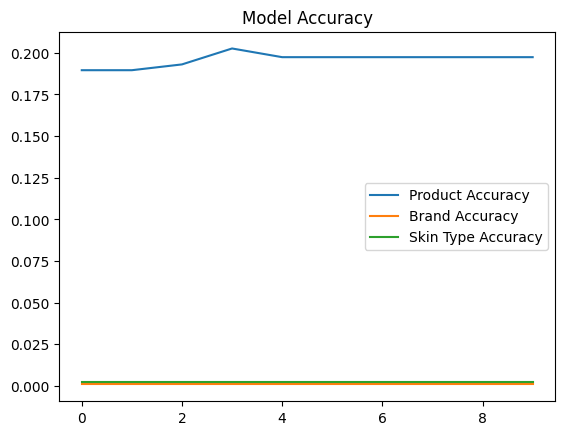

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['Product_Output_accuracy'], label='Product Accuracy')
plt.plot(history.history['Brand_Output_accuracy'], label='Brand Accuracy')
plt.plot(history.history['Skin_Type_Output_accuracy'], label='Skin Type Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


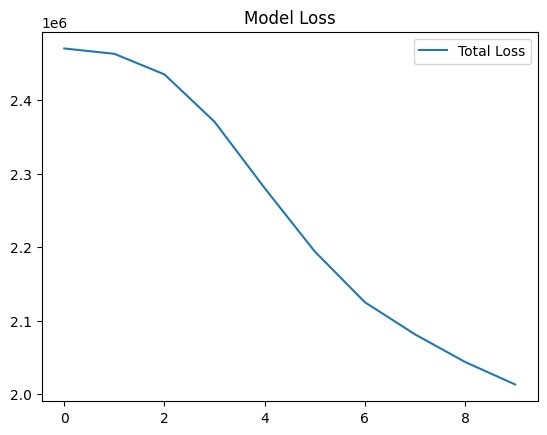

In [29]:
# Plot loss
plt.plot(history.history['loss'], label='Total Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

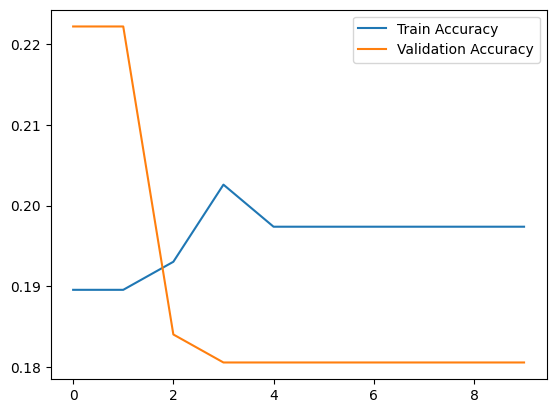

In [30]:
plt.plot(history.history['Product_Output_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Product_Output_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


<ipython-input-34-69785cbb2abc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics, palette='Blues_d')


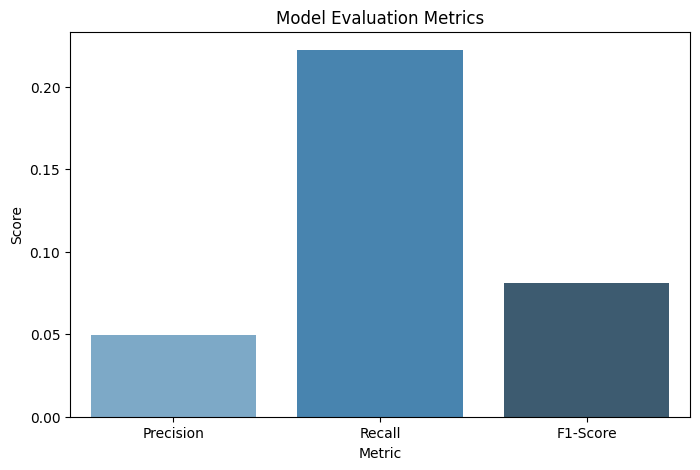

In [34]:
# Visualize the evaluation metrics
metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [precision, recall, f1]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics, palette='Blues_d')
plt.title('Model Evaluation Metrics')
plt.show()